In [1]:
import fitz  # Import the PyMuPDF library


# Extracting Text from PDF

In [2]:
def extract_text_from_pdf(pdf_path):
    document = fitz.open(pdf_path)  # Open the PDF file
    text = ""
    for page in document:  # Iterate through each page
        text += page.get_text()  # Extract text from the page
    document.close()  # Close the document
    return text

In [6]:
# Replace 'yourfile.pdf' with the path to your PDF file
# pdf_text_1 = extract_text_from_pdf("Underwriting/Yash LOE 11.16.2023.pdf")
pdf_text_2 = extract_text_from_pdf("data/pdfs/Yash_Patel_2022_-_T4_Slip.pdf")
print(pdf_text_2)

T4 (22) Protected B when completed / Protégé B une fois rempli
Employer's name – Nom de l'employeur
Williams Operating Corporation
Williams Operating Corporation
Surface Warehouse
Marathon  ON  P0T 2E0
CAN
Canada Revenue 
Agency
Agence du revenue 
du Canada
Year
Année
2022
T4
Statement of Remuneration Paid
État de la rémunération payée
Employment income
Revenus d'emploi
14
122,024.52
Income tax deducted
Impôt sur le revenu retenu
22
32,036.29
54
Employer's account number / Numéro de compte de l'employeur
Social insurance number
Numéro d'assurance sociale
Exempt – Exemption
CPP/QPP
EI
PPIP
28
RPC/RRQ
AE
RPAP
12
599 136 058
Province of employment
Province d'emploi
10
ON
Employee's CPP contributions – see over
Cotisations de l'employé au RPC – voir au verso
16
3,499.80
EI insurable earnings
Gains assurables d'AE
24
60,300.00
Employment code
Code d'emploi
29
Employee's QPP contributions – see over
Cotisations de l'employé au RRQ – voir au verso
17
CPP/QPP pensionable earnings
Gains ouvrant

## Extracting Employment income from T4 - employee

In [7]:
pdf_lines = pdf_text_2.split('\n')
i = pdf_lines.index('Employment income')
t4_income = pdf_lines[i+3]
t4_income

'122,024.52'

# Detecting T4 data using OCR

In [30]:
import cv2
import pytesseract
from pytesseract import Output
from pdf2image import convert_from_path
import re 
from IPython.display import display
from PIL import Image
import matplotlib.pyplot as plt
pytesseract.pytesseract.tesseract_cmd = r'N:\Program Files\Tesseract-OCR\tesseract.exe'


In [ ]:
pdf_path = 'N:/Dev/AI/Underwriting/data/clients/Hemat and Amy/Hemant/Hemant Sud 2021 T4.pdf'
imgs = convert_from_path(pdf_path)
display(imgs[0])

# Preprocessing
## Cropping

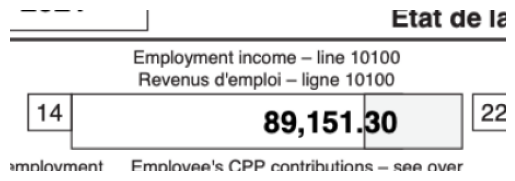

In [92]:
from PIL import Image
import matplotlib.pyplot as plt

def crop_image_to_top_right(image_path, cropped_path):
# Function to load an image and crop it to the top-right quarter
    image = convert_from_path(image_path)[0]
    # image = Image.open(image_path)
    # Crop coordinates for the top-right quarter
    width, height = image.size
    crop_coords = (width // 2, 0, width, height // 2)
    cropped_image = image.crop(crop_coords)
    
    width, height = cropped_image.size
    crop_coords = (0, height // 2, width, height )
    cropped_image = cropped_image.crop(crop_coords)

    width, height = cropped_image.size
    crop_coords = (0, 0, width // 2, height // 2 )
    cropped_image = cropped_image.crop(crop_coords)

    width, height = cropped_image.size
    crop_coords = (0, height // 2, width, height )
    cropped_image = cropped_image.crop(crop_coords)

    cropped_image.save(cropped_path)
    return cropped_image

# Display the cropped image
def display_image(image):
    plt.imshow(image)
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.show()


# Path to your image
image_path = 'N:/Dev/AI/Underwriting/data/clients/Hemat and Amy/Hemant/Hemant Sud 2021 T4.pdf'
cropped_path = 'N:/Dev/AI/Underwriting/data/clients/Hemat and Amy/Hemant/Hemant Sud 2021 T4_cropped.jpg'

# Crop the image to the top-right quarter
cropped_image = crop_image_to_top_right(image_path, cropped_path)

# Display the cropped top-right image
display_image(cropped_image)

# Now, 'top_right_image' holds the cropped image for further processing



# Tesseract OCR

In [93]:
text = pytesseract.image_to_string(cropped_image, lang='eng', output_type=Output.STRING)
print("PDF text detected: \n" + text)

PDF text detected: 
Etat ae le

Employment income — line 10100
Revenus d'emploi — ligne 10100

89,151.80 | (22

aint  Emniniaatc CPP ennitrihiitinne — eae nver


# Paddle OCR

In [94]:
from paddleocr import PaddleOCR, draw_ocr
from PIL import Image
import matplotlib.pyplot as plt
from PIL import ImageFont

In [95]:
ocr = PaddleOCR(use_angle_cls=True, lang='en') # need to run only once to download and load model into memory
result = ocr.ocr(cropped_path, cls=True)
print("##################################################################")
print("Results: \n")
for idx in range(len(result)):
    res = result[idx]
    for line in res:
        print(line)

[2024/03/18 17:12:22] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\edent/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\edent/.paddleocr/whl\\rec\\en\\en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_len

In [96]:
for line in result[0]:
    print(f"Line: {line}")
    print()
    for lin in line:
        print(f"Lin: {lin}")
    print()

Line: [[[328.0, 0.0], [422.0, 0.0], [422.0, 18.0], [328.0, 18.0]], ('Etat de la', 0.8700001835823059)]

Lin: [[328.0, 0.0], [422.0, 0.0], [422.0, 18.0], [328.0, 18.0]]
Lin: ('Etat de la', 0.8700001835823059)

Line: [[[106.0, 33.0], [334.0, 33.0], [334.0, 49.0], [106.0, 49.0]], ('Employment income-line 10100', 0.9616879224777222)]

Lin: [[106.0, 33.0], [334.0, 33.0], [334.0, 49.0], [106.0, 49.0]]
Lin: ('Employment income-line 10100', 0.9616879224777222)

Line: [[[110.0, 53.0], [330.0, 53.0], [330.0, 68.0], [110.0, 68.0]], ("Revenus d'emploi-ligne 10100", 0.959592342376709)]

Lin: [[110.0, 53.0], [330.0, 53.0], [330.0, 68.0], [110.0, 68.0]]
Lin: ("Revenus d'emploi-ligne 10100", 0.959592342376709)

Line: [[[18.0, 77.0], [49.0, 77.0], [49.0, 99.0], [18.0, 99.0]], ('14', 0.9982060194015503)]

Lin: [[18.0, 77.0], [49.0, 77.0], [49.0, 99.0], [18.0, 99.0]]
Lin: ('14', 0.9982060194015503)

Line: [[[216.0, 82.0], [332.0, 82.0], [332.0, 109.0], [216.0, 109.0]], ('89,151.30', 0.9866149425506592)]


In [97]:
# draw result
from PIL import Image
image = Image.open(cropped_path).convert('RGB')
result=result[0]
boxes = [line[0] for line in result]
print(f"boxes\n{boxes}")
txts = [line[1][0] for line in result]
print(f"txts\n{txts}")
scores = [line[1][1] for line in result]
im_show = draw_ocr(image, boxes, txts, scores)
im_show.save('result.jpg')
im_show = Image.fromarray(im_show)

boxes
[[[328.0, 0.0], [422.0, 0.0], [422.0, 18.0], [328.0, 18.0]], [[106.0, 33.0], [334.0, 33.0], [334.0, 49.0], [106.0, 49.0]], [[110.0, 53.0], [330.0, 53.0], [330.0, 68.0], [110.0, 68.0]], [[18.0, 77.0], [49.0, 77.0], [49.0, 99.0], [18.0, 99.0]], [[216.0, 82.0], [332.0, 82.0], [332.0, 109.0], [216.0, 109.0]], [[398.0, 73.0], [424.0, 73.0], [424.0, 101.0], [398.0, 101.0]], [[14.0, 129.0], [79.0, 129.0], [79.0, 137.0], [14.0, 137.0]]]
txts
['Etat de la', 'Employment income-line 10100', "Revenus d'emploi-ligne 10100", '14', '89,151.30', '22', 'inlovment']


OSError: cannot open resource

In [98]:
from paddleocr import PaddleOCR, draw_ocr

# Paddleocr supports Chinese, English, French, German, Korean and Japanese.
# You can set the parameter `lang` as `ch`, `en`, `fr`, `german`, `korean`, `japan`
# to switch the language model in order.
ocr = PaddleOCR(use_angle_cls=True, lang="ch", page_num=2)  # need to run only once to download and load model into memory
# img_path = './xxx.pdf'
img_path = pdf_path
result = ocr.ocr(img_path, cls=True)
for idx in range(len(result)):
    res = result[idx]
    for line in res:
        print(line)

# draw result
import fitz
from PIL import Image
import cv2
import numpy as np
imgs = []
with fitz.open(img_path) as pdf:
    for pg in range(0, pdf.pageCount):
        page = pdf[pg]
        mat = fitz.Matrix(2, 2)
        pm = page.getPixmap(matrix=mat, alpha=False)
        # if width or height > 2000 pixels, don't enlarge the image
        if pm.width > 2000 or pm.height > 2000:
            pm = page.getPixmap(matrix=fitz.Matrix(1, 1), alpha=False)

        img = Image.frombytes("RGB", [pm.width, pm.height], pm.samples)
        img = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
        imgs.append(img)
for idx in range(len(result)):
    res = result[idx]
    image = imgs[idx]
    boxes = [line[0] for line in res]
    txts = [line[1][0] for line in res]
    scores = [line[1][1] for line in res]
    im_show = draw_ocr(image, boxes, txts, scores, font_path='doc/fonts/simfang.ttf')
    im_show = Image.fromarray(im_show)
    im_show.save('result_page_{}.jpg'.format(idx))

[2024/03/18 17:12:29] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=2, det_algorithm='DB', det_model_dir='C:\\Users\\edent/.paddleocr/whl\\det\\ch\\ch_PP-OCRv4_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\edent/.paddleocr/whl\\rec\\ch\\ch_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_len

AttributeError: 'Document' object has no attribute 'pageCount'